<a href="https://colab.research.google.com/github/benjaminnigjeh/2000726_Structured_data_classifier/blob/master/pdac_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
1/1 [==============================] - 1s 712ms/step - loss: 3.1963 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 1.8858 - accuracy: 0.6071
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 1.0134 - accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6149 - accuracy: 0.8571
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.4672 - accuracy: 0.9286
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3775 - accuracy: 0.9643
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 0.3046 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2431 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1939 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 18ms/step - loss: 0.1553 - accuracy: 1.0000
Epoch 11/50
1/1 [=======

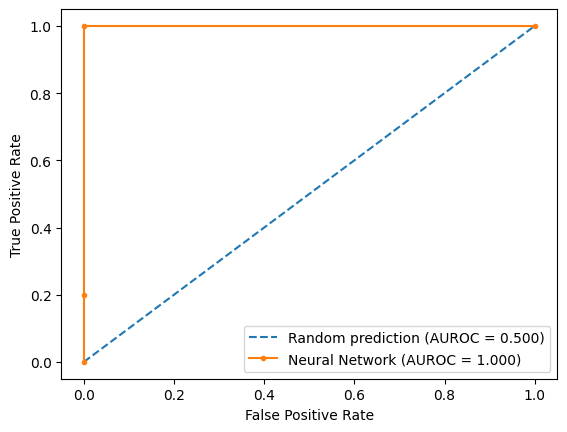

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as TF





file_path = 'https://raw.githubusercontent.com/benjaminnigjeh/dataset_repo/main/training_dataset.csv'
X = pd.read_csv(file_path)
Y_train = X.pop("target")
X_train = X.copy()
X_train = np.array(X_train)
Y_train = np.array(Y_train)

file_path = 'https://raw.githubusercontent.com/benjaminnigjeh/dataset_repo/main/test_dataset.csv'
X = pd.read_csv(file_path)
Y_test = X.pop("target")
X_test = X.copy()
X_test = np.array(X_test)
Y_test = np.array(Y_test)

def predict(model, X_train, Y_train, X_test):
    clf = model.fit(X_train, Y_train)
    a = clf.predict_proba(X_test)
    return a[:, 1]

model = TF.keras.models.Sequential()
model.add(TF.keras.layers.Dense(150, activation=TF.nn.relu))
model.add(TF.keras.layers.Dense(200, activation=TF.nn.relu))
model.add(TF.keras.layers.Dense(20, activation=TF.nn.softmax))
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(X_train, Y_train, epochs=50)
a = model.predict(X_test)
model_probs = a[:, 1]
model_auc = roc_auc_score(Y_test, model_probs)

r_probs = [0 for _ in range(len(Y_test))]
r_auc = roc_auc_score(Y_test, r_probs)

r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, model_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Neural Network (AUROC = %0.3f)' % model_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()


# New Section